## Covid-19 Vaccine Distribution: *Worldwide Edition*

#### Societal Problem

The issue of the Coronavirus pandemic is one that the entire world is not only extremely aware of, but one that has greatly impacted the lives of most. With development of effective vaccines, countries around the world are working to deliver vaccines to their residents as efficiently as possible. However, every country may not have equal access to the vaccine, and well-to-do countries may have much easier access to the vaccine than their less well-off counterparts. Insight into vaccine distribution among different countries could potentially highlight a problem of inequalities of Covid-19 vaccine distributions across the world.

#### Problem Justification

Receiving the Covid vaccine is vital in protecting against Covid-19, just like how the flu vaccine is vital
to avoid contraction of the flu. More vaccines will lead to less people contracting Covid, thus dramatically reducing the 
spread. According to the Centers for Disease Control and Prevention, "COVID-19 vaccination will be an important tool to
help stop the pandemic." <sup>1</sup> 

However, vaccines must be bought before they can be distributed, which can make it more difficult to obtain in poorer countries. As a result, Covid may remain a continuous problem in those areas. The obvious impact of Covid's continued existence is the detrimental health effects. The virus has caused almost 2.82 million deaths worldwide as of April 1st, 2021, however has infected almost 130 Million people worldwide.<sup>2</sup> Commonly observed effects of the virus include, but are not limited to, fever, cough, fatigue, and nausea<sup>3</sup>, however there is no way to be sure of the long term effects of the virus. In fact, studies have begun to find evidence of hidden neurological long term effects of Covid-19. Harvard studies have found that some individuals who have recovered from the virus show impaired attention ability, likely due to oxygen deprevation in the brain, which leads to minor brain damage. Covid infection may also lead to higher risk of alzheimers in the future. <sup>4</sup> 

In additon to health risks, Coronavirus has posed as a major risk to the global economy. Travel and tourism industries have suffered due to lockdowns
in many parts of the world. Airlines experienced a large dropoff in revenue due to the fact that there is very little need for flights during a pandemic. <sup>5</sup> Additionally, countries with economies that heavily depend on tourism, such as Jamaica, have seen dramatic declines in their economy. <sup>6</sup> Equally as important, there has been a decline in consumer demand for products due to the fact that so many places have some type of lockdown enforced. This decrease in demand has led to cuts in the number of workers in an effort to optimize company revenue, resulting in increased global unemployment and a $3.5 trillion loss in global income. <sup>7</sup>

It is obvious that mitigating these detrimental effects of Covid-19 is important for not only global health, but also the global economy. By exploring possible sources of vaccine distribution inequalities, we can gain some insight into the patterns of global vaccine distribution. 

#### Research Questions

- How even is the current distribution of vaccines across all countries?
- Is there any relationship between economic indicators, such as GDP  
    and unemployment rate, and the amount of vaccines distributed within a given country?

Gross Domestic Product (GDP) is a good metric due to the fact that it measures the monetary value of goods and services produced within a country. This provides an easily accessible metric for each country in question and is especially appropriate because we want to determine how vaccine distribution depends on the economic well-being of a country, which is well expressed by GDP.<sup>10</sup> In turn, unemployment rates can be helpful factors in determining the health of an economy.<sup>7</sup> It is important to consider these factors for the entire world rather than just a specific country because of the nature of Covid-19. The virus has impacted the entire globe and shut down international travel and had detrimental effects on the world economy because countries rely on each other for trading.<sup>11</sup> Looking at specific countries would not suffice because of how connected countries are to each other. A solution to stopping the spread of Covid-19 will have to consider the entire globe. 

Identifying if there is a relationship between vaccine distribution and economic indicators could help determine ways to stop the spread of Covid-19.
The importance of stoping the spread of Covid-19 is clear, and by determining where vaccine distribution is weaker than other countries, efforts can be made to make vaccines more readily available for individuals within those areas. 

#### Datasets

[**Country Vaccinations**](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) - 
(Updated March 14th, 2021) This dataset provides vaccination information such as vaccination brand, date, total vaccinations, total people fully vaccinated for a total of 136 different countries. Similar information is available in terms of percentages rather that total numbers. We will be concerned with the total count data so that we are fair when comparing countries of greatly different population sizes. Original data comes from [Our World in Data](https://github.com/owid/covid-19-data)
<br><br> [**Economic Freedom Index**](https://www.kaggle.com/lewisduncan93/the-economic-freedom-index) - (Updated February 26, 2019) This dataset provides lots of data regarding government spending, variations of GDP, unemployment, and numerous measures of freedom, such as business, labor, monetary, and trade freedom, for 186 different countries. We will concern ourselves with country name, GDP, and unemployment rate. Original data comes from [The Heritage Foundation](https://www.heritage.org/index)

#### Data Exploration

In [104]:
#Setup and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

vac_raw = pd.read_csv('data/country_vaccinations.csv')
econ_raw = pd.read_csv('data/economic_freedom_index2019_data.csv', encoding='latin-1')

##### Setup vaccination and economic factors dataframes

In [6]:
econ = pd.DataFrame()
econ['Country Name'] = econ_raw['Country Name']
econ['GDP (Billions, PPP)'] = econ_raw['GDP (Billions, PPP)']
econ['Unemployment (%)'] = econ_raw['Unemployment (%)']

vac = pd.DataFrame()
vac['country'] = vac_raw['country']
vac['date'] = vac_raw['date']
vac['total_vaccinations'] = vac_raw['total_vaccinations']

##### Observe last reported dates for each country

In [16]:
#We can see a wide rande of most recent reportings for each country
latest = vac.groupby(['country'])['date'].max().astype('datetime64') 
print("From: ", latest.min(), " to ", latest.max())
latest.head(35)

From:  2021-01-18 00:00:00  to  2021-03-14 00:00:00


country
Albania              2021-03-12
Algeria              2021-02-19
Andorra              2021-03-10
Angola               2021-03-08
Anguilla             2021-02-26
Argentina            2021-03-14
Australia            2021-03-14
Austria              2021-03-13
Azerbaijan           2021-03-14
Bahrain              2021-03-14
Bangladesh           2021-03-14
Barbados             2021-03-12
Belarus              2021-02-18
Belgium              2021-03-13
Belize               2021-03-12
Bermuda              2021-03-10
Bolivia              2021-03-14
Brazil               2021-03-14
Bulgaria             2021-03-14
Cambodia             2021-03-14
Canada               2021-03-14
Cayman Islands       2021-03-12
Chile                2021-03-14
China                2021-02-28
Colombia             2021-03-13
Costa Rica           2021-03-12
Cote d'Ivoire        2021-03-14
Croatia              2021-03-12
Cyprus               2021-03-07
Czechia              2021-03-14
Denmark              2021-03-13


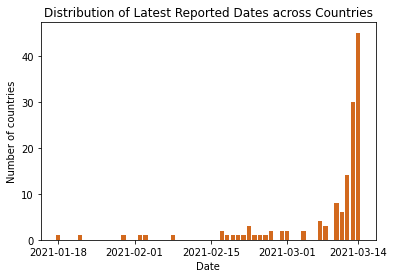

In [92]:
#Get all of the dates within our range of January 18th to March 14th
start = pd.to_datetime('2021-01-18')
end = pd.to_datetime('2021-03-14')
dates = pd.date_range(start,end,freq='D')
dates_axis = pd.Series([t.strftime('%Y%m%d') for t in dates]).apply(lambda x: pd.to_datetime(x))
dates_axis = list(dates_axis.apply(lambda x: str(x)[:10]))

#For each date, find the number of countris that last reported on this day
count = latest.groupby([latest.dt.year, latest.dt.month, latest.dt.day]).count()
levels = [count.index.levels[0].values, count.index.levels[1].values, range(32)]
new_index = pd.MultiIndex.from_product(levels, names=count.index.names)[18:-17]
new_index = new_index.drop((2021, 2, 29))
new_index = new_index.drop((2021, 2, 30))
new_index = new_index.drop((2021, 2, 31))
new_index = new_index.drop((2021, 2, 0))
new_index = new_index.drop((2021, 3, 0))
count = count.reindex(new_index, fill_value=0)

#Plot the distribution of last-reported dates
plt.bar(dates_axis,list(count), color='chocolate')
plt.title('Distribution of Latest Reported Dates across Countries')
plt.xlabel('Date')
plt.ylabel('Number of countries')
plt.xticks(['2021-01-18', '2021-02-01', '2021-02-15', '2021-03-01', '2021-03-14'])
plt.show()

In [24]:
#Percent of countries with dates on/after March 1st
print("Percent of countries in March: ", round(latest[latest >= '2021-03-01'].count()/latest.count(),2))    

Percent of countries in March:  0.84


The fact that the last reported dates are so far apart may cause some issues. It would be unfair to compare two countries if the date of their last reported data is two months apart. 
<br><br>One option would be to look at the data from each country on January 18th, however this would mean ignoring almost two months of important data. 
<br><br>A better option may be to only look at countries with later report dates. If we look at countries with dates between March 1st and March 14th, we can still observe 84% of the given data

In [26]:
#Remove all  entries with dates before march
vac = vac[vac['date'] >= '2021-03-01']        
#Remore all entries with NaN total vaccination count
vac = vac.drop(vac[vac['total_vaccinations'].isnull()].index.values)  
#Keep the last date for each country
vac = vac.drop_duplicates(['country'], keep='last')
vac = vac.reset_index()
vac = vac.drop(['index'], axis=1)
vac.head(20)

,country,date,total_vaccinations
0,Albania,2021-03-12,23635.0
1,Andorra,2021-03-10,4914.0
2,Angola,2021-03-08,6169.0
3,Argentina,2021-03-14,2381429.0
4,Australia,2021-03-14,162551.0
5,Austria,2021-03-13,1026244.0
6,Azerbaijan,2021-03-14,453586.0
7,Bahrain,2021-03-14,551197.0
8,Bangladesh,2021-03-14,4398094.0
9,Barbados,2021-03-12,50980.0


Now we have a list of countries along with their most recent data report date and total vaccinations given

##### Observe total vaccination distribution

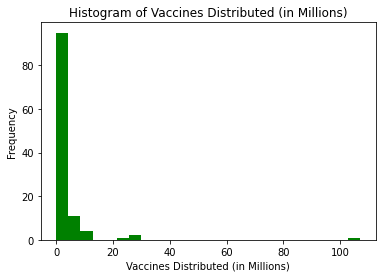

count    114.000000
mean       2.910631
std       10.886642
min        0.001215
25%        0.040812
50%        0.256012
75%        1.253572
max      107.060274
Name: total_vaccinations, dtype: float64

In [93]:
plt.hist(vac['total_vaccinations'].apply(lambda x: x/1000000), bins=25, color='green')
plt.title("Histogram of Vaccines Distributed (in Millions)")
plt.xlabel('Vaccines Distributed (in Millions)')
plt.ylabel('Frequency')
plt.show()
vac['total_vaccinations'].apply(lambda x: x/1000000).describe()

The distribution of total vaccines given is extremely right skewed. As we can see, half of the countries have given below 250,000 vaccines and 75% of countries have given below 1,250,000 vaccines. However, there are some countries that have given a much greater amount of vaccines. 

In [28]:
vac['total_vaccinations'].sort_values().tail()

14      11422666.0
31      21683887.0
107     25781120.0
46      29908038.0
108    107060274.0
Name: total_vaccinations, dtype: float64

We can see from the distribution and the output above that there is one extreme outlier, which has given more than 107 million vaccines. 

##### Who is the Outlier?

In [29]:
max = vac['total_vaccinations'].dropna().max()    
vac['country'][vac['total_vaccinations'] == max].values[0]

'United States'

The United States is the outlier with over 107 million vaccines. Let's remove the US for a second to try and get insight into the rest of the data.

##### Observing Vaccine Distribution without the United States

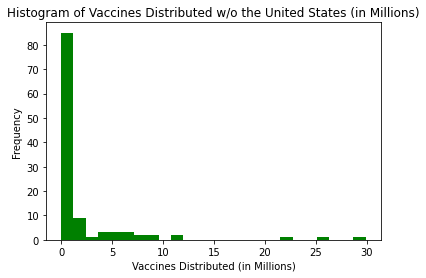

count    113.000000
mean       1.988952
std        4.676598
min        0.001215
25%        0.039428
50%        0.254000
75%        1.163873
max       29.908038
Name: total_vaccinations, dtype: float64

Next highest:  India


In [94]:
#Now without the US
tot_vac = vac['total_vaccinations'].apply(lambda x: int(float(x)))
plt.hist(tot_vac.sort_values()[:-1].apply(lambda x: x/1000000), bins=25, color='green')
#vac['total_vaccinations'].apply(lambda x: x/1000)
plt.title("Histogram of Vaccines Distributed w/o the United States (in Millions)")
plt.xlabel('Vaccines Distributed (in Millions)')
plt.ylabel('Frequency')
plt.show()
print(tot_vac.sort_values()[:-1].apply(lambda x: x/1000000).describe())
max = tot_vac.sort_values()[:-1].dropna().max()    
print("\nNext highest: ", vac['country'][vac['total_vaccinations'] == max].values[0])

Even after removing the United States as out outlier, the data is still extremely right skewed. The distribution still has very similar characteristics to the one including the US, except now, the maximum is about 30 million vaccines. 

##### **Answering our First Question**

  - How even is the current distribution of vaccines across all countries?

From the distribution, we can see that the distribution of total vaccines distributed per country is extremely right skewed. 75% of countries have administered below 1.25 Million vaccines as of March 14th, 2021. There is one country which is a great outlier with about 107 Million vaccine distributions, which is the United States.

After removing the United States at 107M total vaccinations, we can see that the data is still heavily right skewed. The next highest number of vaccinations after the United States is around 30M in India, which is a large difference. After removing the United States, we can see that 75% of data is now below 1.16 Million vaccines. 

Overall, we can see that the distribution of Covid-19 vaccines is dramatically uneven across the globe. While some countries have very high numbers of vaccine totals when compared to other countries, the vast majority of countries have given below 1.25 Million vaccines within their country, resulting in a heavily right skewed distribution. However, we should be careful when applying this generalization since our data only included 114 out of 195 countries in the world. It is possible for the missing countries to share commonalities that the observed countries do not, so at this point, our findings should apply to the observed set of countries only. 

##### Log Transform Vaccine Distribution

We will ultimately make a scatterplot with total vaccines distributed as a variable, so lets see if we can make the distribution look more normal through a logarithm transformation. 

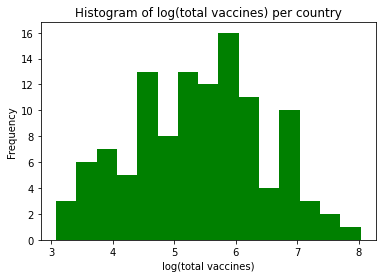

Since the p-value is 0.47, which is greater than .05, we can accept the null hypothesis that the data now approximately follows a normal distribution


In [95]:
plt.hist(np.log10(tot_vac), bins = 15, color='green')     
plt.title('Histogram of log(total vaccines) per country')
plt.xlabel('log(total vaccines)')
plt.ylabel('Frequency')
plt.show()

#Shapiro Wilk test for normality
test_stat, p_val = stats.shapiro(np.log10(tot_vac))
print("Since the p-value is", str(round(p_val,2)) + ", which is greater than .05, we can accept the null hypothesis that the data now approximately follows a normal distribution")

##### Observe distribution of Country GDP

In [53]:
gdps = [[x, econ[econ['Country Name'] == x]['GDP (Billions, PPP)']] for x in vac['country']]

#Oh no! The united kingdom is split up into Northern Ireland, Scotland, Wales, and England
#A few other places are formatted differently, so I'll go back manually or look them up
pd.Series(gdps)
gdps[1][1] = ['$3.2']       #Andorra
gdps[12][1] = ['$7.5']      #Bermuda
gdps[18][1] = ['$5.5']      #Cayman Islands
gdps[22][1] = ['$96.9']     #Cote d'Ivoire
gdps[25][1] = ['$250.7']    #Czechia
gdps[31][1] = ['$2,500']    #England
gdps[33][1] = ['$3.1']      #Faeroe Islands
gdps[38][1] = ['$3.2']      #Gibraltar
gdps[40][1] = ['$3.1']      #Greenland
gdps[42][1] = ['$3.5']      #Guernsey
gdps[49][1] = ['$7.5']      #Isleof Man
gdps[53][1] = ['$6.6']      #Jersey
gdps[58][1] = ['$6.5']      #Liechtenstein
gdps[61][1] = ['$53.9']     #Macao
gdps[72][1] = ['$63.5']     #Northern Ireland
gdps[86][1] = ['$1.7']      #San Marino
gdps[88][1] = ['$205']      #Scotland
gdps[96][1] = ['$2,029.0']  #South Korea
gdps[112][1] = ['$103.7']   #Wales

#Reformat the GDPs
realgdps = pd.Series(gdps).apply(lambda x: list(x[1])[0].replace('$','').replace(',', '').strip())
realgdps = realgdps.apply(lambda x: float(x))

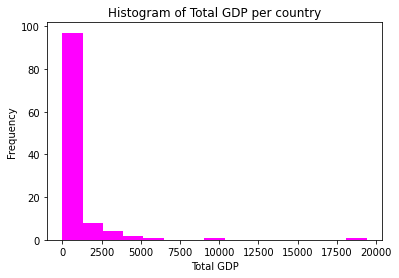

In [96]:
plt.hist(realgdps, bins = 15, color='magenta')
plt.title('Histogram of Total GDP per country')
plt.xlabel('Total GDP')
plt.ylabel('Frequency')
plt.show()

Once again, we can see that GDP data across all observed countries is very right skewed. 

##### Log transform GDP distribution

Lets see if we can make the data look more normal through a logarithm distribution

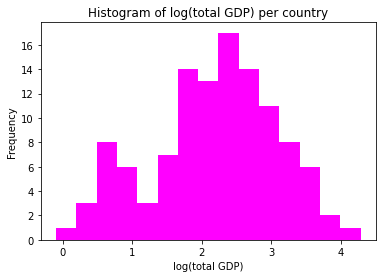

p-value:  0.0475


In [97]:
plt.hist(np.log10(realgdps), bins = 15, color='magenta')
test_stat, p_val = stats.shapiro(np.log10(realgdps))
plt.title('Histogram of log(total GDP) per country')
plt.xlabel('log(total GDP)')
plt.ylabel('Frequency')
plt.show()

#Shapiro Wilk test for normality
test_stat, p_val = stats.shapiro(np.log10(realgdps))
print("p-value: ", round(p_val,4))

The p-value is rather small and less than .05, so we should **reject** the null hypothesis that this distribution approximately follows a normal distribution. However, this distribution is still much closer to normal than the non-transformed distribution is. 

##### Observe Distribution of Country Unemployment Rates

In [73]:
emp = econ['Unemployment (%)']
emp = [[x, econ[econ['Country Name'] == x]['Unemployment (%)']] for x in vac['country']]

#Again, data was either missing or formatted incorrectly, so we must fill in the missing values
pd.Series(emp)
emp[1][1] = ['1.7']       #Andorra
emp[12][1] = ['6']        #Bermuda
emp[18][1] = ['3.4']      #Cayman Islands
emp[22][1] = ['3.21']     #Cote d'Ivoire
emp[25][1] = ['2.24']     #Czechia
emp[27][1] = ['5.74']     #Dominica
emp[31][1] = ['4.2']      #England
emp[33][1] = ['2.1']      #Faeroe Islands
emp[38][1] = ['1']        #Gibraltar
emp[40][1] = ['2.4']      #Greenland
emp[42][1] = ['1.7']      #Guernsey
emp[49][1] = ['1.8']      #Isle of Man
emp[53][1] = ['1.6']      #Jersey
emp[58][1] = ['1.6']      #Liechtenstein
emp[61][1] = ['1.8']      #Macao
emp[72][1] = ['3.9']      #Northern Ireland
emp[86][1] = ['8']        #San Marino
emp[88][1] = ['4.3']      #Scotland
emp[91][1] = ['3']        #Seychelles
emp[96][1] = ['3.7']      #South Korea
emp[112][1] = ['4.5']     #Wales
emp = pd.Series(emp).apply(lambda x: float(list(x[1])[0].strip()))

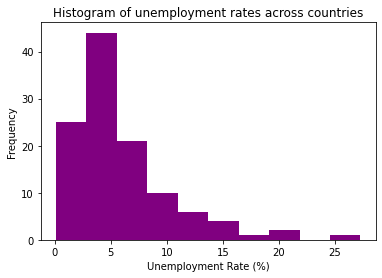

p-value:  4.066749437203754e-10


In [100]:
plt.hist(emp, color='purple')
plt.title('Histogram of unemployment rates across countries')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.xticks()
plt.show()

test_stat, p_val = stats.shapiro(emp)
print("p-value: ", p_val)

The distribution of unemployment rates is also right skewed, although not as heavily this time. This distribution does not resemble a normal distribution, as seen by the very small p-value from the Shapiro-Wilks Normality Test.

##### Log Transform Unemployment Rate Distribution

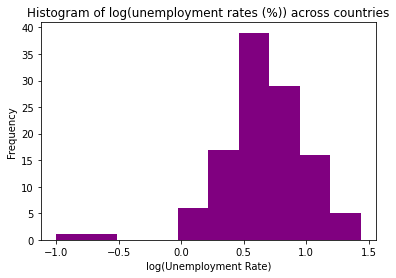

p-value:  4.726912720798282e-06


In [101]:
plt.hist(np.log10(emp), color="purple")
plt.title('Histogram of log(unemployment rates (%)) across countries')
plt.xlabel('log(Unemployment Rate)')
plt.ylabel('Frequency')
plt.xticks()
plt.show()

#Shapiro Wilk test for normality
test_stat, p_val = stats.shapiro(np.log10(emp))
print("p-value: ", p_val)

Our distribution now appears to be left skewed. However, the p-value from the Shapiro-Wilk normality test is larger than the non-transformed distribution, so this distribution is a bit closer to a normal distribution than the non-transformed distribution of unemployment rate. 

##### Comparing Total Vaccines Distributed vs. Country GDP

To observe the relationship between the total vaccines given within a country and the country's GDP, we can make a scatterplot with our data. Since the log-transformed data was more normal than the non-transformed data, we will plot the log-transformed data.

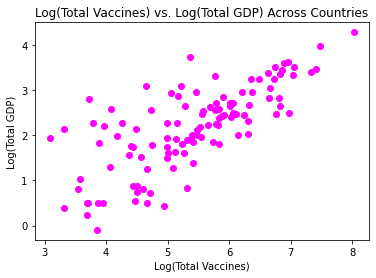

In [102]:
plt.scatter(np.log10(tot_vac), np.log10(realgdps), color="magenta")
plt.title('Log(Total Vaccines) vs. Log(Total GDP) Across Countries')
plt.xlabel('Log(Total Vaccines)')
plt.ylabel('Log(Total GDP)')
plt.show()

In [80]:
#Finding Spearman Correlation Coefficient
corr, p_value = stats.spearmanr(np.log10(tot_vac), np.log10(realgdps))
print(round(corr,2), " : " , p_value)

0.74  :  6.559731509371865e-21


The Spearman Correlation Coefficient is .74, showing a strong (approaching very strong) monotonic relationship between total vaccines distributed and country GDP. The p-value is extremely small, thus it is very unlikely that a correlation coefficient produced would be this strong if there was no correlation between total vaccines and GDP. 

##### Comparing Total Vaccines Distributed vs. Unemployment Rate

To observe the relationship between the total vaccines given within a country and the country's unemployment rate, we can make a scatterplot with our data. Since the log-transformed data was more normal than the non-transformed data, we will plot the log-transformed data.

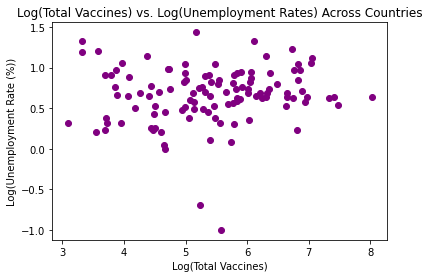

In [103]:
plt.scatter(np.log10(tot_vac), np.log10(emp), color="purple")
plt.title('Log(Total Vaccines) vs. Log(Unemployment Rates) Across Countries')
plt.xlabel('Log(Total Vaccines)')
plt.ylabel('Log(Unemployment Rate (%))')
plt.show()

In [91]:
corr, p_value = stats.spearmanr(np.log10(tot_vac),np.log10(emp))
print(round(corr,2), " : " , round(p_value,3))

0.13  :  0.175


The Spearman Correlation Coefficient is .13, showing a very weak monotonic relationship between total vaccines distributed and country GDP. The p-value, .18, is greater than .05, meaning that it is likely that a correlation coefficient such as ours would be produced if there was no correlation between total vaccines and pre-Covid employment rates. 

##### Answering our Second Question

  - Is there any relationship between economic indicators, such as GDP and unemployment rate, and the amount of vaccines distributed within a given country?

After observing a scatterplot of total vaccines distributed data and country GDP data on a log transformed scale, a clear pattern emerges. There appears so be a positive correlation between a country's GDP and the total number of vaccines which they have administered. To analyze their relationship, we found the Spearman Correlation Coefficient and its associated p-value. The coefficient is .74 and the p-value is essentially 0. Our small p-value tells us that there is about a 0% chance that we would have found a coeffient of .74 is there is no correlation between country GDP and total vaccines given. The strength and direction of the relationship is determined by our coefficient, .74. This tells us that the relationship between country GDP and covid vaccines is somewhere between strong and very strong. This does not speak to the causation of the relationship, however it may spark ideas about possible hypotheses that could explain the relationship and could be tested in the future. One hypothesis may propose the idea that more vaccines are given in countries with higher GDP's because they are more likely to be able to afford the vaccines for their citizens. 

We can also analyze the relationship between total vaccines given and pre-Covid unemployment rates between different countries. Plotting total vaccines distributed versus country unemployment rate on a scatterplot did not yield any clear pattern. We again found a Spearman Correlation Coefficient and it associated p-value, which came out to be .13 and 0.175 respectively. The p-value is rather high and tells us that there is a 17.5% chance that we would have found a correlation coeffient of .13 if there is no relationship between country unemployment rate and total vaccines distributed. This is moderately large percentage, so we can not make any conclusions that there is a relationship between a country's pre-Covid unemployment rate and total vaccines given. 

Once again, we are only able to apply these findings to the countries within our dataset. We have observed only 114 out of the 195 countries in the world. From our data, we have no way of knowing whether the countries not recorded share commonalities that the countries we did observe do not have. Without knowledge of the sampling techniques or data on every country in the world, we are not able to accurately generalize our findings to all countries. Further investigation would be needed. 

##### Ethical Considerations

From our data available, we have seen that countries with higher GPD's have administered higher amounts of vaccines to their citizens. This can easily put those countries with lower GDP's at a disadvantage. Despite the global pandemic, companies produce vaccines for profit, and countries with higher GDP's may have easier access to these vaccines because they have the money to pay for the limited supply of vaccines. This pattern is likely to continue until countries with higher GDP's no longer have a large demand for the vaccine. Vaccine producers would then have to consider what their next step would be, whether it be lower the price to provide the poorer countries with easier vaccine access, or abandon vaccine production and pursue another course of action that may maximizes their profit. This choice presents itself as choosing between personal gain and profit or global wellbeing, which  may help the global economy and come back to help them as well. 

Additionally, this data seems to highlight a pattern that will make the values of national governments of poorer nations more difficult to achieve. The fact that these countries do not administer as many vaccines as richer countries may put the government in poor social standing. Citizens and other countries may see the govenment as ineffective in performing their duty to protect its citizens. This in turn doesn't allow for citizens to acheive their goal of receiving a vaccine as quick as possible. Dependent on relationship between the dominant races within each country and a country's GDP, this inability to provide a vaccine may be mistaken for the ineffectiveness of certain races to provide for their country and create unwarrented racism. In addition, while countries with higher GDP may be able to return to their contributions to the global economy as they were before Covid, these lower GDP countries may have a more difficult time. Many of these small impacts on the global economy may sum to create a considerable impact for every other country involved. 

There are also reasons for concerns about the actions that may not be taken despite the relationship between total vaccined administered and GDP. If third world countries do not have easy access to Covid-19 vaccines, it could become another disease that continuously threatens third world countries, in addition to diseases such as TB, Malaria, and HIV/AIDS. <sup>8</sup> However, Covid-19 is different from these diseases in the way that it spreads. Malaria spreads through mosquitos and HIV spreads through contact of bodily fluids. Although TB does spread in a respiratory way, it requires more time of exposure to spread than Covid-19 does, meaning that Covid-19 spreads more easily. <sup>9</sup> If covid is stopped within wealthier countries and interations pick back up with poorer countries, then Covid could possibly mutate within those areas are spread back to the US, where the current vaccine may or may not protect individuals from the virus. Even within those areas of poorer countries, economies may continue to struggle as they were before a vaccine because the vaccine is not available to them, which has a negative impact on the global economy. This shows that controlling the virus is not only a humane course of action, but also has potential lingering results on the economy and future health of Americans and citizens of other countries.

Regarding unemployment rates of countries before Covid, we did not find a relationship to total vaccines administered within that country. Just because we didn't find one does not necessarily mean that there isn't one. The absence of a relationship may be mistaken for the equality of all countries in gaining access to and administering a vaccine. In reality, the absense of a relationship between two factors doesn't mean there is no relationship to another factor, as seen with GDP. If these results are mistaken for equality in vaccine access, then this may incorrectly be leveraged as an excuse to not help countries that have shown low total vaccination counts. 

In respect to the distributions of specific variables among countries, such as their total vaccine counts, GDP, and unemployment, clear outliers may be incorrectly outed as being far superior or inferior to other countries. Outliers are clear to see in this distributions because of the skewness in the data. Outliers in the total vaccines and GDP distribution may be viewed as somehow superior to other countries. On the other hand, outliers in the unemployment rate distribution may be viewed as inferior to other countries. 

As seen above, it is possible for premature assumptions to be made from our data. The patterns found or not found in this analysis may serve as a good starting point for other analyses or may promote other questions, however should not be used to create assumptions without further analysis. Applying the data to real life is an important part to understanding that data, however it must be applied in a cautious and thought out manner. 

##### Sources

<sup>1</sup> Centers for Disease Control and Prevention. *Benefits of Getting a COVID-19 Vaccine.* Centers for Disease Control and Prevention. [https://www.cdc.gov/coronavirus/2019-ncov/vaccines/vaccine-benefits.html. ](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/vaccine-benefits.html)
<br><sup>2</sup> “COVID-19 Dashboard by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU).” *ArcGIS Dashboards*, John Hopkins Coronavirus Resource Center, 2021, [www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6.](www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6.)
<br><sup>3</sup> *Symptoms of Coronavirus*. (2021, February 22). Retrieved April 01, 2021, from [https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html](https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html)
<br><sup>4</sup> Budson, A. (2021, March 04). *The hidden long-term cognitive effects of covid-19*. Retrieved April 01, 2021, from [https://www.health.harvard.edu/blog/the-hidden-long-term-cognitive-effects-of-covid-2020100821133](https://www.health.harvard.edu/blog/the-hidden-long-term-cognitive-effects-of-covid-2020100821133)
<br><sup>5</sup> Szmigiera, M. (2021, March 24). *Impact of the coronavirus pandemic on the global economy - Statistics & Facts*. Retrieved April 01, 2021, from [https://www.statista.com/topics/6139/covid-19-impact-on-the-global-economy/](https://www.statista.com/topics/6139/covid-19-impact-on-the-global-economy/)
<br><sup>6</sup> *Jamaica: Economic Outline*. Mar. 2021, [www.lloydsbanktrade.com/en/market-potential/jamaica/economy](www.lloydsbanktrade.com/en/market-potential/jamaica/economy)
<br><sup>7</sup> Amadeo, Kimberly. “Unemployment Rate, Effect, and Trends.” *The Balance*, Dotdash, 21 Nov. 2020, [www.thebalance.com/unemployment-rate-3305744#:~:text=The%20unemployment%20rate%20is%20an,sectors%20are%20losing%20jobs%20faster](www.thebalance.com/unemployment-rate-3305744#:~:text=The%20unemployment%20rate%20is%20an,sectors%20are%20losing%20jobs%20faster)
<br><sup>8</sup> Singh, Ajai R, and Shakuntala A Singh. “Diseases of poverty and lifestyle, well-being and human development.” *Mens sana monographs* vol. 6,1 (2008): 187-225. doi:10.4103/0973-1229.40567
<br><sup>9</sup> “Fact Check: Post Comparing Responses to Tuberculosis and COVID-19 Pandemics Lacks Key Information.” *Reuters*, Thomson Reuters, 19 Aug. 2020, [www.reuters.com/article/uk-factcheck-covid-tb/fact-check-post-comparing-responses-to-tuberculosis-and-covid-19-pandemics-lacks-key-information-idUSKCN25F16X](https://www.reuters.com/article/uk-factcheck-covid-tb/fact-check-post-comparing-responses-to-tuberculosis-and-covid-19-pandemics-lacks-key-information-idUSKCN25F16X) 
<br><sup>10</sup> Inflab. “Is GDP a Good Measure of Economic Well-Being?” *Medium*, Medium, 9 July 2018, [medium.com/@Inflab/is-gdp-a-good-measure-of-economic-well-being-7ad449ded139#:~:text=GDP%20measures%20both%20the%20economy's,expenditure%20on%20goods%20and%20services.&amp;text=Because%20most%20people%20would%20prefer,being%20of%20the%20average%20individual](medium.com/@Inflab/is-gdp-a-good-measure-of-economic-well-being-7ad449ded139#:~:text=GDP%20measures%20both%20the%20economy's,expenditure%20on%20goods%20and%20services.&amp;text=Because%20most%20people%20would%20prefer,being%20of%20the%20average%20individual) 
<br><sup>11</sup> “List of Countries by Leading Trade Partners.” *Wikipedia*, Wikimedia Foundation, 11 Feb. 2021, [en.wikipedia.org/wiki/List_of_countries_by_leading_trade_partners](en.wikipedia.org/wiki/List_of_countries_by_leading_trade_partners) 